In [301]:
import sys
import os
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
from itertools import combinations



# Get the current working directory
current_dir = os.getcwd()

# Add the 'src' directory to sys.path (the parent folder of 'Data' and 'algorithms')
src_dir = os.path.abspath(os.path.join(current_dir, '..'))  
sys.path.append(src_dir)

# Now import the modules
from Data import testData
from algorithms.distance_matrix.distance_matrix import get_distance_matrix
from algorithms.randomness.random_permutation import random_permutation
from algorithms.randomness.random_permutation_ml import random_permutation_ml
import algorithms.randomness.random_grouping_selection as random_grouping_selection
from algorithms.randomness.random_grouping_selection_ml import random_grouping_selection_ml
from algorithms.randomness.possible_groups import possible_groups
#importlib.reload(algorithms.distance_matrix)



This jupyternotebook collects all current benchmarks.

Section A analysis groups of 3

|               |                                                      |
| :------------ | -------------------------------------------------:   |
| df_A1         | n_rows=30, ("hom_", 3), ("hom_", 4), ("het_hot", 3),("het_hot", 4), ("hot_hom", 3), ("hot_hom", 3)  |
| df_A2         | n_rows=60, ("hom_", 3), ("hom_", 4), ("het_hot", 3),("het_hot", 4), ("hot_hom", 3), ("hot_hom", 3)  |
| df_A3         | n_rows=90, ("hom_", 3), ("hom_", 4), ("het_hot", 3),("het_hot", 4), ("hot_hom", 3), ("hot_hom", 3)  |
| df_A4         | n_rows=120, ("hom_", 3), ("hom_", 4), ("het_hot", 3),("het_hot", 4), ("hot_hom", 3), ("hot_hom", 3) |


Section B analysis groups of 4

In [362]:
# Import test data
df_A1 = testData.df_A1
df_A2 = testData.df_A2
df_A3 = testData.df_A3
df_A4 = testData.df_A4


# Scale Data
columns_to_scale = ['hom__1', 'hom__2']
scaler = MinMaxScaler()

df_A1[columns_to_scale] = scaler.fit_transform(df_A1[columns_to_scale])
df_A2[columns_to_scale] = scaler.fit_transform(df_A2[columns_to_scale])
df_A3[columns_to_scale] = scaler.fit_transform(df_A3[columns_to_scale])
df_A4[columns_to_scale] = scaler.fit_transform(df_A4[columns_to_scale])

distance_matrix_df_A1 = get_distance_matrix(df_A1)
distance_matrix_df_A2 = get_distance_matrix(df_A2)
distance_matrix_df_A3 = get_distance_matrix(df_A3)
distance_matrix_df_A4 = get_distance_matrix(df_A4)



In [282]:

file_path_occ_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\occ_results_group_size_2.pkl"
file_path_random_2_occ = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_group_size_2_occ.pkl"
file_path_dst_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\dst_results_group_size_2.pkl"
file_path_random_2_dst = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_group_size_2_dst.pkl"
file_path_occdst_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\occdst_results_group_size_2.pkl"
file_path_random_2_occdst = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_size_2_occdst.pkl"

# Open file "occ_results_group_size_2"
with open(file_path_occ_2, "rb") as file:
    occ_results_group_size_2 = pickle.load(file)

# best distances from random_occ_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_occ_2 = [t[4][0][0] for t in occ_results_group_size_2]

# Open file "random_results_group_size_2_occ"
with open(file_path_random_2_occ, "rb") as file:
    random_results_group_size_2_occ = pickle.load(file)

# best distances from random_grouping_selection, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_occ_2 = [t[2][0][0] for t in random_results_group_size_2_occ]

##########################################################################################################

# Open file "dst_results_group_size_2.pkl"
with open(file_path_dst_2, "rb") as file:
    dst_results_group_size_2 = pickle.load(file)

# best distances from random_dst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_dst_2 = [t[4][0][0] for t in dst_results_group_size_2]

# Open file "random_results_group_size_2_dst.pkl"
with open(file_path_random_2_dst, "rb") as file:
    random_results_group_size_2_dst = pickle.load(file)

# best distances from random_dst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_dst_2 = [t[2][0][0] for t in random_results_group_size_2_dst]

##########################################################################################################

# Open file "occdst_results_group_size_2"
with open(file_path_occdst_2, "rb") as file:
    occdst_results_group_size_2 = pickle.load(file)

# best distances from random_occdst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_occdst_2 = [t[4][0][0] for t in occdst_results_group_size_2]

# Open file "random_results_group_size_2_occdst"
with open(file_path_random_2_occdst, "rb") as file:
    random_results_group_size_2_occdst = pickle.load(file)

# best distances from random_grouping_selection, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_occ_2 = [t[2][0][0] for t in random_results_group_size_2_occdst]

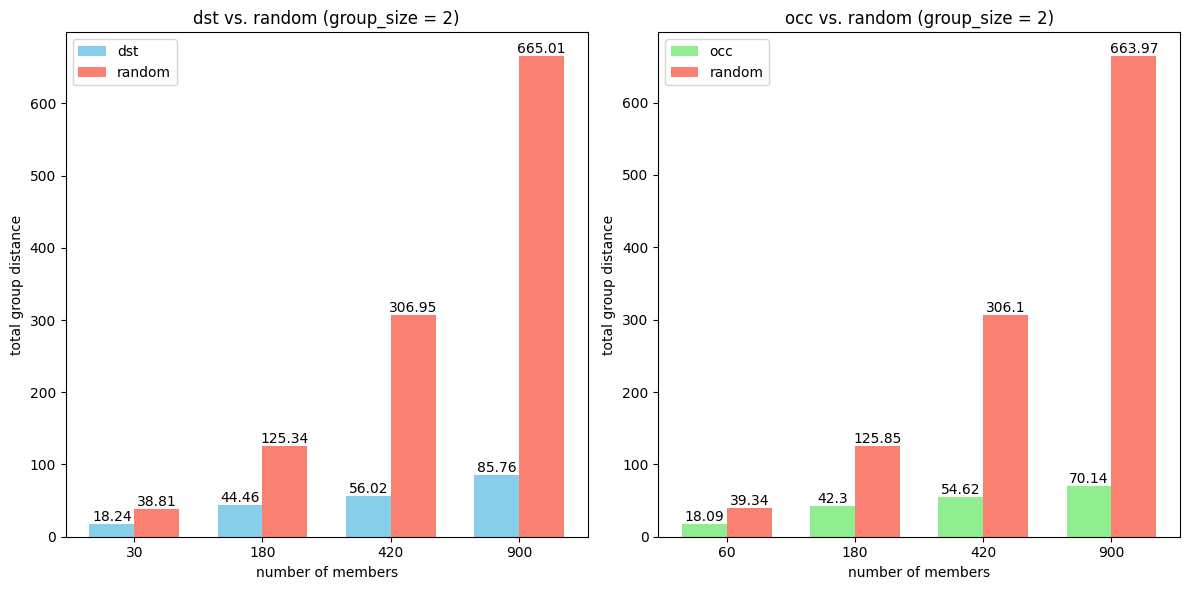

In [ ]:
# Create bar positions
bar_width = 0.35
index = np.arange(len(best_distances_dst_2))

# Create the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for the first subplot (dst vs. random)
bars_x_dst = ax1.bar(index - bar_width / 2, best_distances_dst_2, bar_width, label='dst', color='skyblue')
bars_y_dst = ax1.bar(index + bar_width / 2, best_distances_random_dst_2, bar_width, label='random', color='salmon')

# Add rounded values on top of each bar in the first plot
for i, bar in enumerate(bars_x_dst):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_y_dst):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)

# Customize the first plot
ax1.set_xlabel('number of members')
ax1.set_ylabel('total group distance')
ax1.set_title('dst vs. random (group_size = 2)')
ax1.set_xticks(index)
ax1.set_xticklabels(["30", "180", "420", "900"])
ax1.legend()

# Plot for the second subplot (occ vs. random)
bars_x_occ = ax2.bar(index - bar_width / 2, best_distances_occ_2, bar_width, label='occ', color='lightgreen')
bars_y_occ = ax2.bar(index + bar_width / 2, best_distances_random_occ_2, bar_width, label='random', color='salmon')

# Add rounded values on top of each bar in the second plot
for i, bar in enumerate(bars_x_occ):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_y_occ):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)

# Customize the second plot
ax2.set_xlabel('number of members')
ax2.set_ylabel('total group distance')
ax2.set_title('occ vs. random (group_size = 2)')
ax2.set_xticks(index)
ax2.set_xticklabels(["60", "180", "420", "900"])
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig("dst_vs_random_vs_occ.png", dpi = 300)

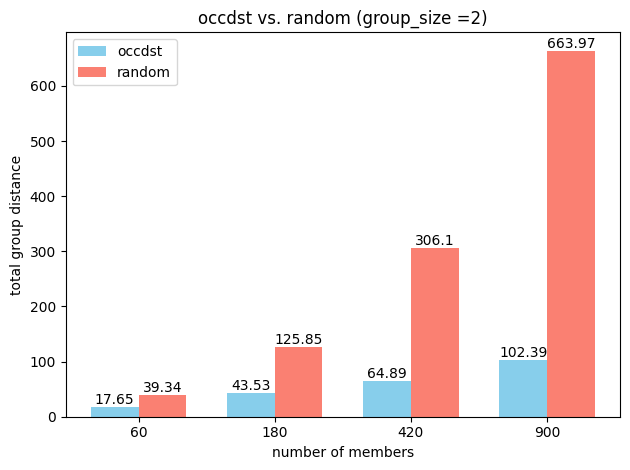

In [ ]:
 

# Create bar positions
bar_width = 0.35
index = np.arange(len(best_distances_occdst_2))

# Create the bar plot
fig, ax = plt.subplots()

# Plot x and y values side by side
bars_x = ax.bar(index, best_distances_occdst_2, bar_width, label='occdst', color='skyblue')
bars_y = ax.bar(index + bar_width, best_distances_random_occ_2, bar_width, label='random', color='salmon')

# Add rounded values on top of each bar
for i, bar in enumerate(bars_x):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)
for i, bar in enumerate(bars_y):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(bar.get_height(), 2)}', ha='center', va='bottom', fontsize=10)

# Customize the plot
ax.set_xlabel('number of members')
ax.set_ylabel('total group distance')
ax.set_title('occdst vs. random (group_size =2)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["60", "180", "420", "900"])
ax.legend()

plt.tight_layout()
plt.show()
#plt.savefig("occdst_vs_random.png", dpi = 300)

In [306]:
# Create distance_matrix
distance_matrix_df_A1 = get_distance_matrix(df_A1)
distance_matrix_df_A1 = pd.DataFrame(distance_matrix_df_A1)

# Get all possible groups and there distance
group_distances_df_A1, distance_list_df_A1 = possible_groups(distance_matrix= distance_matrix_df_A1, group_size=3)


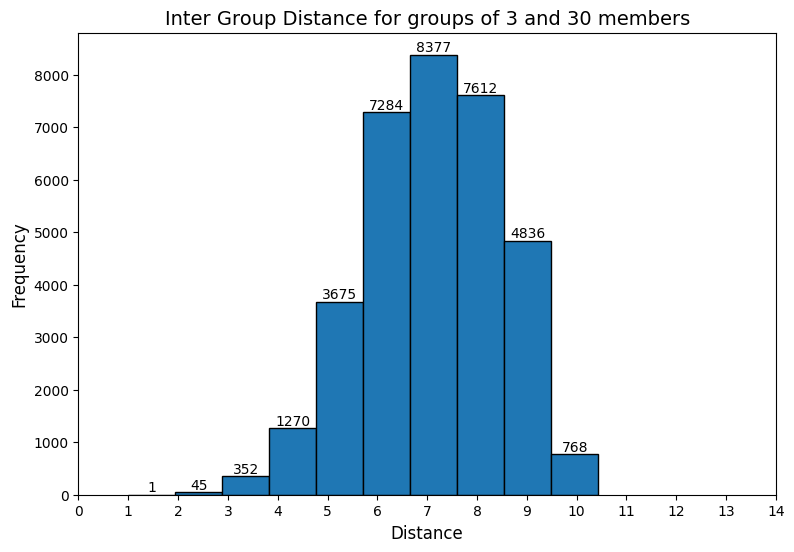

In [ ]:
# Histogram for df_A1
fig, ax = plt.subplots(figsize=(9, 6))

n, bins, patches = ax.hist(distance_list_df_A1, bins=10, edgecolor="black")

# Set x-axis ticks from 1 to 14
ax.set_xticks(range(0, 15))

# Display count above each bar
for i in range(len(patches)):
    count = int(n[i])  # Get the count for each bin
    height = patches[i].get_height()  # Get the height of the bar
    ax.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(count), 
            ha='center', va='bottom', fontsize=10)
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Distance", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

plt.show()
#plt.savefig("Inter_Group_Distance_A1.png", dpi = 300)

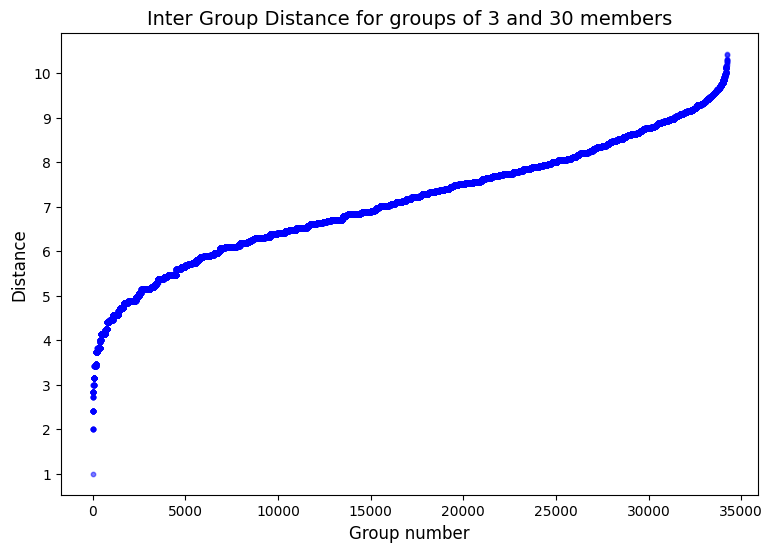

In [ ]:
# Scatterlot for df_A1
distance_list_df_A1.sort()

fig, ax = plt.subplots(figsize=(9, 6))

ax.set_yticks(range(1, 15))


plt.scatter(range(len(distance_list_df_A1)), distance_list_df_A1, s=10, alpha=0.5, color='blue')  # Small size, add transparency
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Group number", fontsize=12)
ax.set_ylabel("Distance", fontsize=12)

plt.show()
#plt.savefig("Inter_Group_Distance_everyone_A1.png", dpi = 300)

In [311]:
# Get the occurances of each member in the k best groups
top_k_groups = 300
top_indice_df_A1 = get_top_k_integer_counts(group_distances_df_A1,top_k_groups)

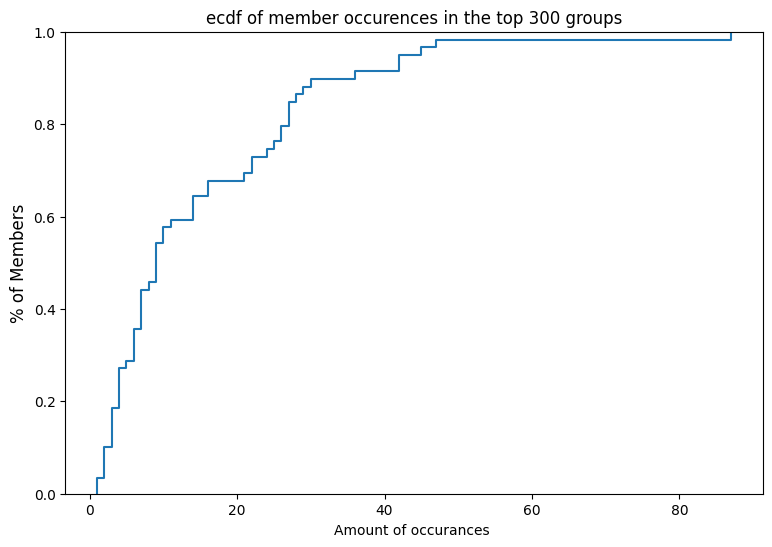

In [ ]:

# Extract keys and values
occurrence_values = list(top_indice_df_A1.values())
occurrence_values.sort()
fig, ax = plt.subplots(figsize=(9, 6))
plt.ecdf(occurrence_values)

# Define the y-axis ticks and intervals
y_ticks = np.arange(0, 1.2, 0.2)

# Shade the areas between y-ticks
colors = ['white', 'white', 'white', 'white', 'white']
for i in range(len(y_ticks) - 1):
    ax.axhspan(y_ticks[i], y_ticks[i + 1], color=colors[i % len(colors)], alpha=0.3)

# Set y-axis limits and ticks
ax.set_ylim(0, 1)
ax.set_yticks(y_ticks)
   
# Add labels and title
plt.xlabel("Amount of occurances ")
plt.ylabel('% of Members', fontsize=12)
plt.title(f"ecdf of member occurences in the top {top_k_groups} groups", fontsize=12)
plt.show()
#plt.savefig("Occurances_A1.png",dpi = 300)


In [369]:
top_10_groups_occ_2 = [tup[4] for tup in occ_results_group_size_2]
print(top_10_groups_occ_2[0])
top_10_groups_occ_2_df_A1 = [y for _, y in top_10_groups_occ_2[0]]
top_10_groups_occ_2_df_A2 = [y for _, y in top_10_groups_occ_2[1]]
top_10_groups_occ_2_df_A3 = [y for _, y in top_10_groups_occ_2[2]]
top_10_groups_occ_2_df_A4 = [y for _, y in top_10_groups_occ_2[3]]


[(18.0855098024866, {0: [21, 13], 1: [18, 34], 2: [27, 31], 3: [14, 11], 4: [52, 1], 5: [56, 17], 6: [36, 29], 7: [51, 49], 8: [2, 41], 9: [7, 24], 10: [15, 19], 11: [8, 6], 12: [48, 32], 13: [53, 59], 14: [40, 10], 15: [44, 43], 16: [35, 37], 17: [45, 23], 18: [3, 39], 19: [20, 58], 20: [22, 9], 21: [57, 54], 22: [42, 33], 23: [16, 25], 24: [12, 50], 25: [4, 28], 26: [30, 26], 27: [47, 55], 28: [38, 0], 29: [5, 46]}), (18.173646415167774, {0: [21, 23], 1: [18, 34], 2: [27, 31], 3: [45, 11], 4: [52, 1], 5: [56, 17], 6: [36, 29], 7: [51, 49], 8: [2, 41], 9: [7, 24], 10: [43, 19], 11: [8, 6], 12: [48, 32], 13: [53, 59], 14: [40, 10], 15: [44, 15], 16: [35, 37], 17: [14, 13], 18: [3, 39], 19: [20, 58], 20: [22, 9], 21: [57, 54], 22: [42, 33], 23: [16, 25], 24: [12, 50], 25: [4, 28], 26: [30, 26], 27: [47, 55], 28: [38, 0], 29: [5, 46]}), (18.245983933365903, {0: [21, 23], 1: [18, 34], 2: [27, 31], 3: [14, 11], 4: [52, 1], 5: [56, 17], 6: [36, 29], 7: [51, 49], 8: [2, 41], 9: [7, 24], 10: 

In [ ]:
import numpy as np
from itertools import combinations

def calculate_distances_and_total(dict_list, distance_matrix):
    """
    Replace dictionary values with the pairwise distances based on a distance matrix
    and calculate the total distance for each dictionary.
    
    Parameters:
        dict_list (list): List of dictionaries, where the values are 1D arrays with indices.
        distance_matrix (np.ndarray): 2D numpy array representing the distance matrix.
        
    Returns:
        list: A list of tuples (total_distance, dictionary_with_distances).
    """
    results = []  # To store the results

    for d in dict_list:
        total_distance = 0
        distance_dict = {}

        for key, indices in d.items():
            # Calculate pairwise distances for all combinations of indices
            pairwise_distances = [
                distance_matrix[i, j] for i, j in combinations(indices, 2)
            ]
            # Store the distances in the dictionary
            distance_dict[key] = pairwise_distances
            
            # Add the sum of these distances to the total distance
            total_distance += sum(pairwise_distances)

        # Append the result as a tuple (total_distance, updated dictionary)
        results.append((total_distance,distance_dict))

    return results

top_10_groups_occ_2_df_A1 = calculate_distances_and_total(top_10_groups_occ_2_df_A1, np.array(distance_matrix_df_A1))
top_10_groups_occ_2_df_A2 = calculate_distances_and_total(top_10_groups_occ_2_df_A2, np.array(distance_matrix_df_A2))
top_10_groups_occ_2_df_A3 = calculate_distances_and_total(top_10_groups_occ_2_df_A3, np.array(distance_matrix_df_A3))
top_10_groups_occ_2_df_A4 = calculate_distances_and_total(top_10_groups_occ_2_df_A4, np.array(distance_matrix_df_A4))



[(18.0855098024866, {0: [1.0540925533894598], 1: [0.6666666666666667], 2: [0.0], 3: [1.118033988749895], 4: [0.33333333333333326], 5: [0.3333333333333333], 6: [0.0], 7: [0.33333333333333326], 8: [0.0], 9: [0.3333333333333334], 10: [1.4142135623730951], 11: [1.0], 12: [0.33333333333333326], 13: [0.6666666666666667], 14: [0.3333333333333333], 15: [1.3017082793177759], 16: [0.3333333333333334], 17: [1.0540925533894598], 18: [0.33333333333333326], 19: [1.0540925533894598], 20: [1.0], 21: [0.3333333333333333], 22: [0.0], 23: [1.0], 24: [0.8333333333333334], 25: [0.3333333333333333], 26: [1.0540925533894598], 27: [0.0], 28: [0.33333333333333326], 29: [1.2018504251546631]}), (18.173646415167774, {0: [1.2018504251546631], 1: [0.6666666666666667], 2: [0.0], 3: [0.8333333333333334], 4: [0.33333333333333326], 5: [0.3333333333333333], 6: [0.0], 7: [0.33333333333333326], 8: [0.0], 9: [0.3333333333333334], 10: [1.4142135623730951], 11: [1.0], 12: [0.33333333333333326], 13: [0.6666666666666667], 14: 

In [378]:
def gini_index(values):
    """
    Calculate the Gini index for a list of numeric values.
    """
    # Ensure no negative values and avoid division by zero
    if not values or sum(values) == 0:
        return 0.0

    values = sorted(values)  # Sort values
    n = len(values)          # Number of elements
    cumulative_sum = sum((i + 1) * value for i, value in enumerate(values))  # Weighted sum
    total_sum = sum(values)  # Total sum of values

    gini = 1 - 2 * cumulative_sum / (n * total_sum) + (n + 1) / n
    return gini

def compute_gini_for_tuples(tuple_list):
    """
    Compute the Gini index for each tuple (x, y) where y is a dictionary.
    If any dictionary value is a list with one value, extract that value.
    The result will be a list of tuples (x, gini_index).
    """
    results = []
    for x, y_dict in tuple_list:
        # Extract the single value from lists or use the value directly
        extracted_values = [v[0] if isinstance(v, list) else v for v in y_dict.values()]
        # Calculate the Gini index
        gini = gini_index(extracted_values)
        results.append((x, gini))
    return results

# Compute the result
result_df_A1 = compute_gini_for_tuples(top_10_groups_occ_2_df_A1)
result_df_A2 = compute_gini_for_tuples(top_10_groups_occ_2_df_A2)
result_df_A3 = compute_gini_for_tuples(top_10_groups_occ_2_df_A3)
result_df_A4 = compute_gini_for_tuples(top_10_groups_occ_2_df_A4)

print(result_df_A1)


[(18.0855098024866, 0.5963975357017333), (18.173646415167774, 0.5891509178146104), (18.245983933365903, 0.5948126627631671), (18.301876505484262, 0.5820017122721104), (18.301876505484262, 0.5820017122721104), (18.30868802781888, 0.5862909757632326), (18.30868802781888, 0.5862909757632326), (18.308688027818885, 0.5862909757632326), (18.308688027818885, 0.5862909757632326), (18.34372578859835, 0.5819773684896279)]


(18.0855098024866, 18.173646415167774, 18.245983933365903, 18.301876505484262, 18.301876505484262, 18.30868802781888, 18.30868802781888, 18.308688027818885, 18.308688027818885, 18.34372578859835)
(0.5963975357017333, 0.5891509178146104, 0.5948126627631671, 0.5820017122721104, 0.5820017122721104, 0.5862909757632326, 0.5862909757632326, 0.5862909757632326, 0.5862909757632326, 0.5819773684896279)


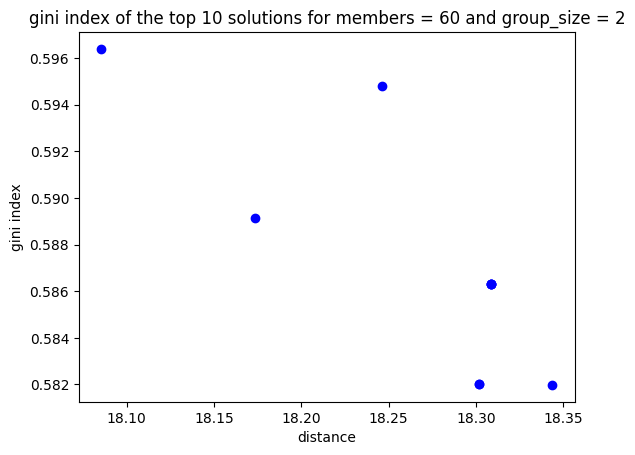

In [ ]:
# Scatterplot for Gini Index on df_A1 with group_size 2

import matplotlib.pyplot as plt

# Example list of tuples

# Unpack the list of tuples into two separate lists
distances_df_A1, gini_df_A1  = zip(*result_df_A1)
print(distances_df_A1)
print(gini_df_A1)
# Create a scatter plot (y-values on the x-axis and x-values on the y-axis)
plt.scatter(distances_df_A1, gini_df_A1, color='blue', marker='o')

# Label the axes
plt.xlabel('distance')
plt.ylabel('gini index')

# Add a title
plt.title('gini index of the top 10 solutions for members = 60 and group_size = 2')

# Show the plot
plt.show()
#plt.savefig("Gini_Index_A1_2.png",dpi = 300)



In [ ]:

file_path_occ_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\occ_results_group_size_2.pkl"
file_path_random_2_occ = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_group_size_2_occ.pkl"
file_path_dst_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\dst_results_group_size_2.pkl"
file_path_random_2_dst = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_group_size_2_dst.pkl"
file_path_occdst_2 = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\occdst_results_group_size_2.pkl"
file_path_random_2_occdst = r"C:\Users\andri\OneDrive - Universitaet Bern\7. Semester\agat\random_results_size_2_occdst.pkl"

# Open file "occ_results_group_size_2"
with open(file_path_occ_2, "rb") as file:
    occ_results_group_size_2 = pickle.load(file)

# best distances from random_occ_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_occ_2 = [t[4][0][0] for t in occ_results_group_size_2]

# Open file "random_results_group_size_2_occ"
with open(file_path_random_2_occ, "rb") as file:
    random_results_group_size_2_occ = pickle.load(file)

# best distances from random_grouping_selection, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_occ_2 = [t[2][0][0] for t in random_results_group_size_2_occ]

##########################################################################################################

# Open file "dst_results_group_size_2.pkl"
with open(file_path_dst_2, "rb") as file:
    dst_results_group_size_2 = pickle.load(file)

# best distances from random_dst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_dst_2 = [t[4][0][0] for t in dst_results_group_size_2]

# Open file "random_results_group_size_2_dst.pkl"
with open(file_path_random_2_dst, "rb") as file:
    random_results_group_size_2_dst = pickle.load(file)

# best distances from random_dst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_dst_2 = [t[2][0][0] for t in random_results_group_size_2_dst]

##########################################################################################################

# Open file "occdst_results_group_size_2"
with open(file_path_occdst_2, "rb") as file:
    occdst_results_group_size_2 = pickle.load(file)

# best distances from random_occdst_rank, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_occdst_2 = [t[4][0][0] for t in occdst_results_group_size_2]

# Open file "random_results_group_size_2_occdst"
with open(file_path_random_2_occdst, "rb") as file:
    random_results_group_size_2_occdst = pickle.load(file)

# best distances from random_grouping_selection, for df_A1, df_A2, df_A4 (in this order) with groupsize 2
best_distances_random_occ_2 = [t[2][0][0] for t in random_results_group_size_2_occdst]

df_A2

In [33]:
# Create distance_matrix
distance_matrix_df_A2 = functions.get_distance_matrix(df_A2, df_A2)

# Get all possible groups and there distance
group_distances_df_A2, distance_list_df_A2 = possible_groups(distance_matrix= distance_matrix_df_A2, group_size=3)

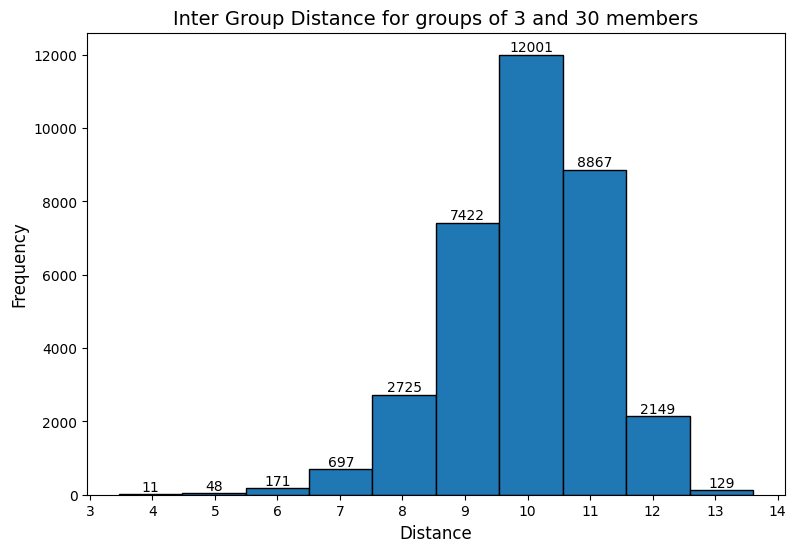

In [34]:
# Histogram for df_A2
fig, ax = plt.subplots(figsize=(9, 6))

n, bins, patches = ax.hist(distance_list_df_A2, bins=10, edgecolor="black")

# Set x-axis ticks from 1 to 14
ax.set_xticks(range(3, 15))

# Display count above each bar
for i in range(len(patches)):
    count = int(n[i])  # Get the count for each bin
    height = patches[i].get_height()  # Get the height of the bar
    ax.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(count), 
            ha='center', va='bottom', fontsize=10)
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Distance", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

plt.show()

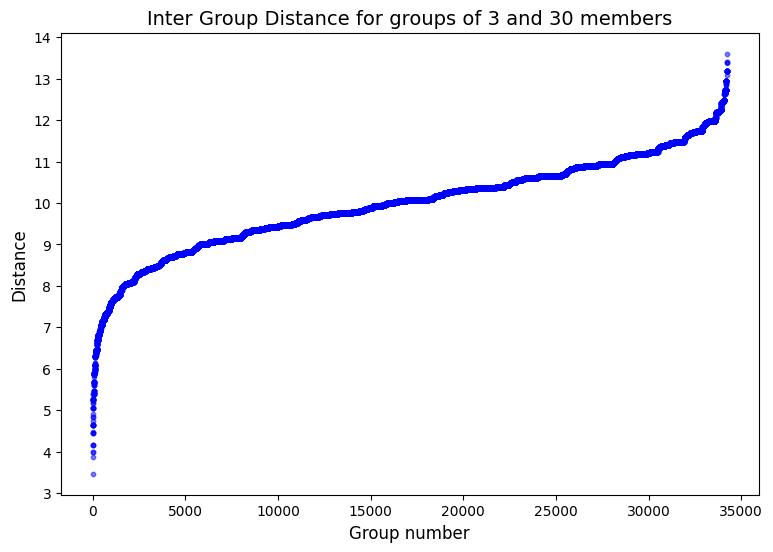

In [35]:
# Scatterlot for df_A2
distance_list_df_A2.sort()

fig, ax = plt.subplots(figsize=(9, 6))

ax.set_yticks(range(1, 15))


plt.scatter(range(len(distance_list_df_A2)), distance_list_df_A2, s=10, alpha=0.5, color='blue')  # Small size, add transparency
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Group number", fontsize=12)
ax.set_ylabel("Distance", fontsize=12)

plt.show()

df_A3

In [36]:
# Create distance_matrix
distance_matrix_df_A3 = functions.get_distance_matrix(df_A3, df_A3)

# Get all possible groups and there distance
group_distances_df_A3, distance_list_df_A3 = possible_groups(distance_matrix= distance_matrix_df_A3, group_size=3)

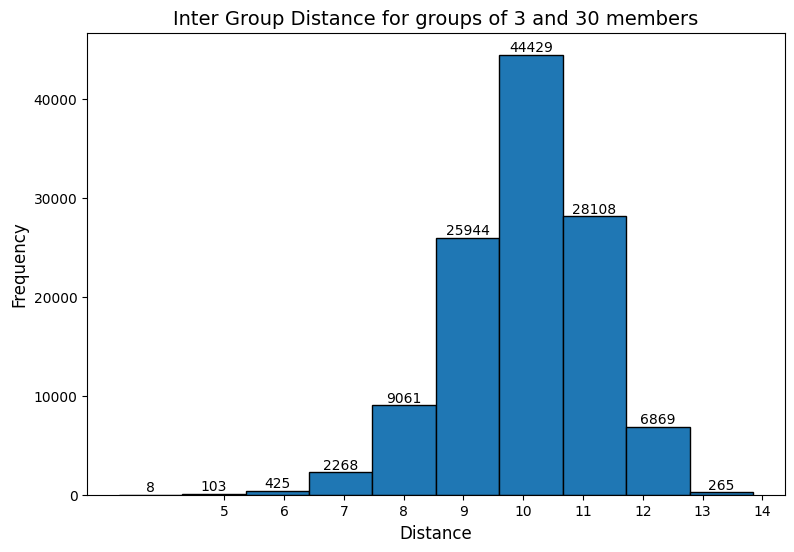

In [37]:
# Histogram for df_A3
fig, ax = plt.subplots(figsize=(9, 6))

n, bins, patches = ax.hist(distance_list_df_A3, bins=10, edgecolor="black")

# Set x-axis ticks from 1 to 14
ax.set_xticks(range(5, 15))

# Display count above each bar
for i in range(len(patches)):
    count = int(n[i])  # Get the count for each bin
    height = patches[i].get_height()  # Get the height of the bar
    ax.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(count), 
            ha='center', va='bottom', fontsize=10)
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Distance", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

plt.show()

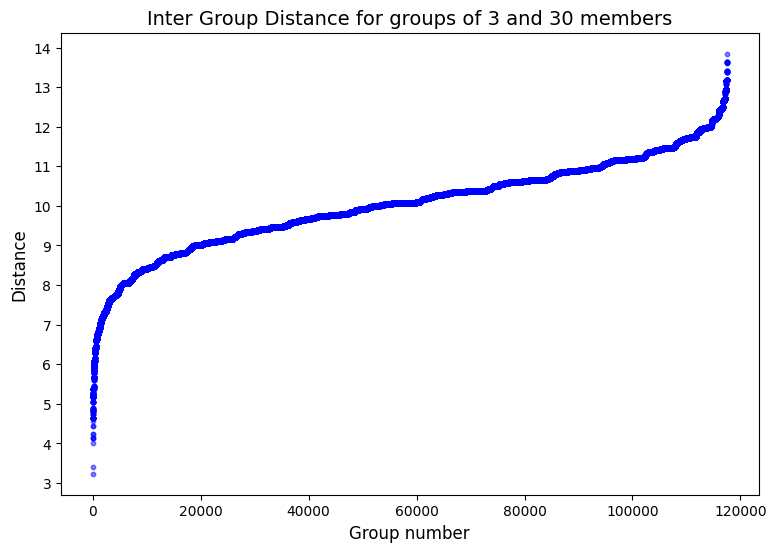

In [38]:
# Scatterlot for df_A3
distance_list_df_A3.sort()

fig, ax = plt.subplots(figsize=(9, 6))

ax.set_yticks(range(1, 15))


plt.scatter(range(len(distance_list_df_A3)), distance_list_df_A3, s=10, alpha=0.5, color='blue')  # Small size, add transparency
    
# Add a title and axis labels
ax.set_title("Inter Group Distance for groups of 3 and 30 members", fontsize=14)
ax.set_xlabel("Group number", fontsize=12)
ax.set_ylabel("Distance", fontsize=12)

plt.show()

In [309]:
def get_top_k_integer_counts(input_dict, k):
    """
    Sorts the dictionary by values and calculates the count of each integer
    across the top k tuples (based on the smallest values).

    Parameters:
    - input_dict: Dictionary with tuples as keys and numeric values.
    - k: Number of top entries to consider.

    Returns:
    - A dictionary with integers as keys and their counts as values.
    """
    # Step 1: Sort the dictionary by its values
    sorted_items = sorted(input_dict.items(), key=lambda x: x[1])
    
    # Step 2: Extract the top k tuples
    top_k_tuples = [key for key, _ in sorted_items[:k]]
    
    # Step 3: Count occurrences of each integer in the top k tuples
    counts = {}
    for tup in top_k_tuples:
        for num in tup:
            counts[num] = counts.get(num, 0) + 1
    
    return counts

import numpy as np